In [0]:
import cv2
import numpy as np
import funciones
import sys
from tensorflow.keras.models import load_model
import os
from getpass import getuser
from skimage.measure import label, regionprops, regionprops_table
import matplotlib.pyplot as plt


In [0]:
new_model = load_model('MobileNetV18.h5', compile=False) # Model

 
#Original Image

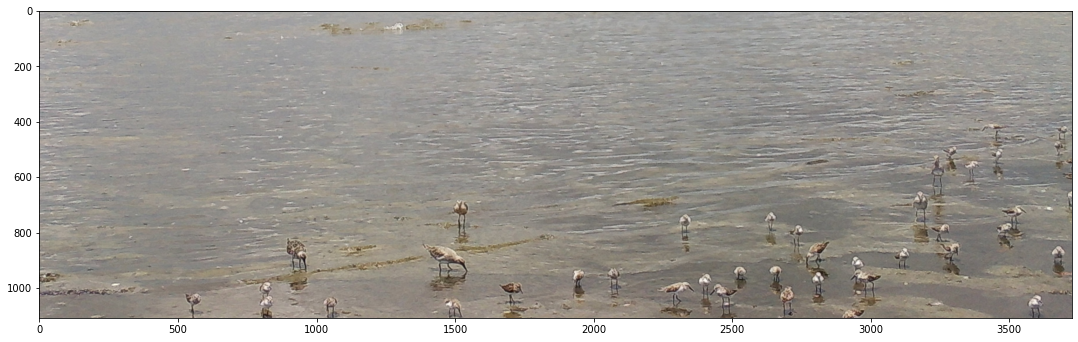

(<matplotlib.image.AxesImage at 0x7f53ddfa4128>, None)

In [25]:
path = '/content/08110201.JPG.JPG' #path of the image to analyze
im = cv2.imread(path, 0) # grayscale
im2 = cv2.imread(path) #BGR
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)), plt.show()

In [0]:
#Step 1.1: Original sector analysis
imO = im

im2 = funciones.NormalizacionIm2(im2) # Normalizing RGB image into multiple of 256
imO = funciones.NormalizacionIm(imO) # Normalizing GrayScale image into multiples o 256
fil, col = imO.shape

#Step 1.2: Image Preprocessing
img = imO
img = cv2.medianBlur(img, 5)
img = cv2.GaussianBlur(img,(5,5),0.6,sigmaY=0.6)

# Segmentation Analysis



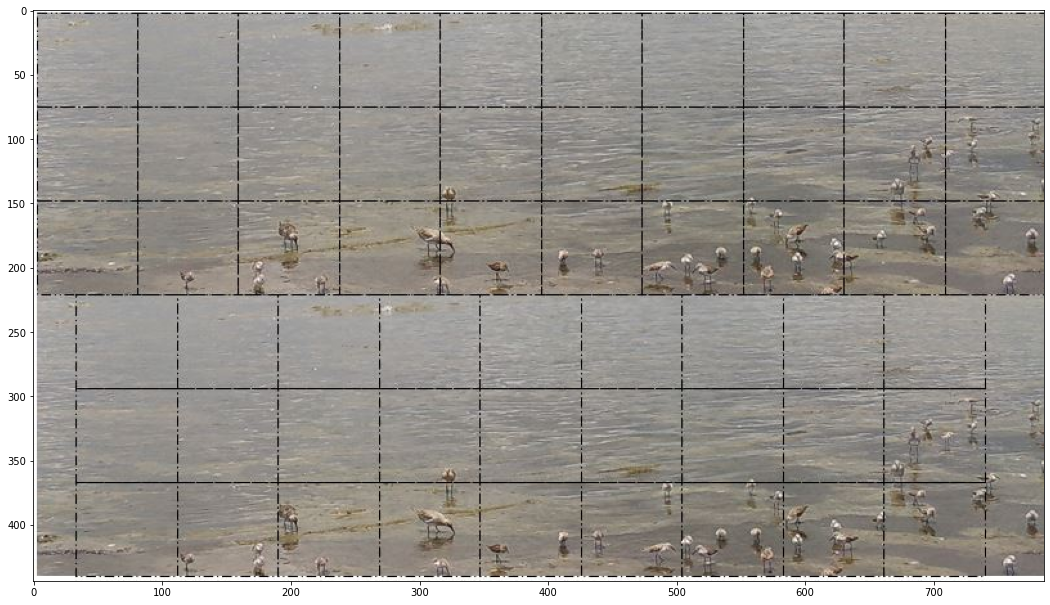

(<matplotlib.image.AxesImage at 0x7f53dd94f5c0>, None)

In [40]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(cv2.cvtColor(cv2.imread('/content/VentanaDeslizante.JPG'), cv2.COLOR_BGR2RGB)), plt.show()

## Outlier extraction

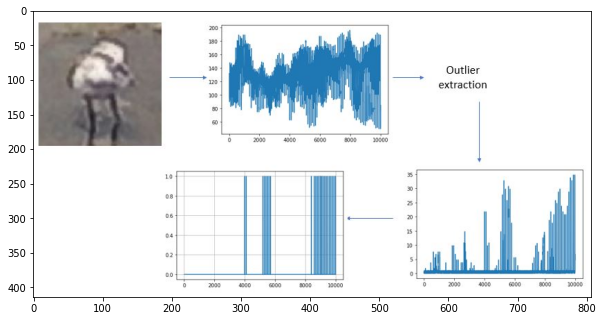

(<matplotlib.image.AxesImage at 0x7f53dd6f1eb8>, None)

In [45]:
path = '/content/OutlierExtraction.JPG' #path of the image to analyze
im = cv2.imread(path, 0) # grayscale
im2 = cv2.imread(path) #BGR
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)), plt.show()

# Segmentation

In [0]:
#Step 1.3: Image Segmentation
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
imT = funciones.Segmentado(img, kernel)

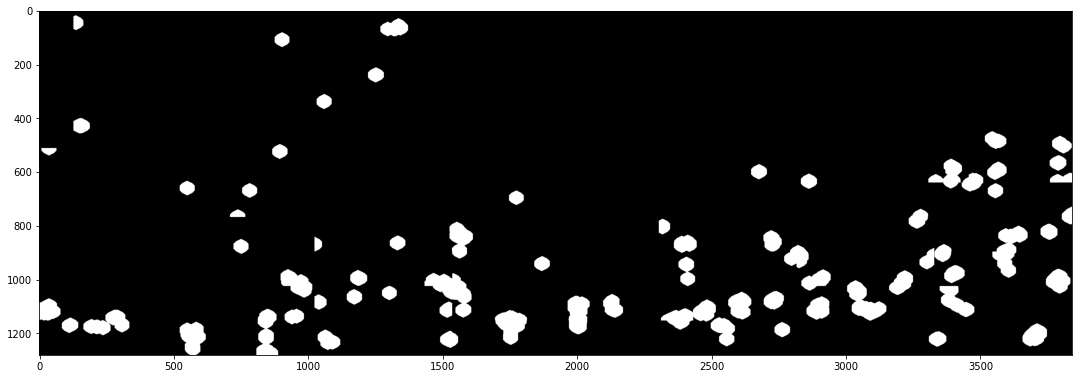

(<matplotlib.image.AxesImage at 0x7f53ddf09048>, None)

In [28]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(imT, cmap = 'gray'), plt.show()

# Region Proposals

In [0]:
#Step 1.4: Regionprops
label_img = label(imT)
regions = regionprops(label_img)

#Filter by area
X = funciones.filtroAreas(regions)

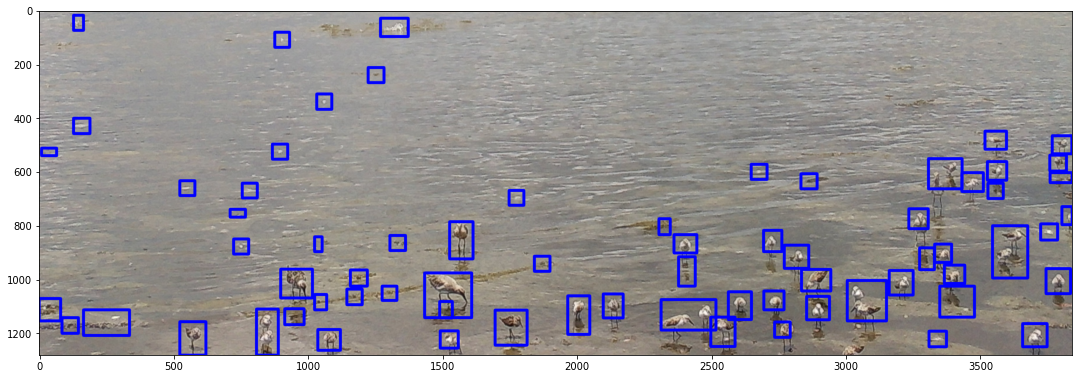

(<matplotlib.image.AxesImage at 0x7f53ddee97f0>, None)

In [30]:
New_Coordinates = X
img2 = im2.copy()
for i in range(len(New_Coordinates["X1"])):
  #Reading coordinates
    x1pp =  New_Coordinates["X1"][i] 
    x2pp =  New_Coordinates["X2"][i] 
    y1pp =  New_Coordinates["Y1"][i] 
    y2pp =  New_Coordinates["Y2"][i] 
    cv2.rectangle(img2, (y1pp, x1pp), (y2pp, x2pp),
    (255, 0, 0) , 10)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.show()


## Preprocessing Identification for each patch classification

In [0]:
Xtest1, Xtest, New_Coordinates = funciones.ROI_Analysis(im2, X, fil, col) #ROI proposals

## Each patch classification and bird counting





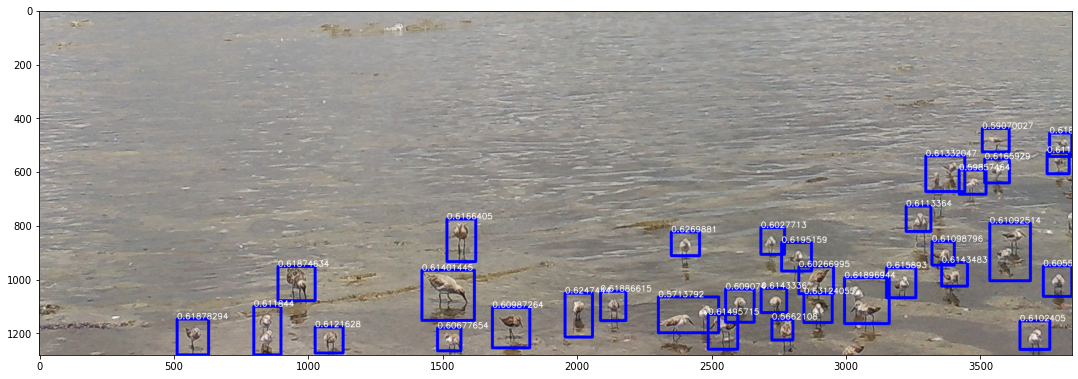

(<matplotlib.image.AxesImage at 0x7f53dde75588>, None)

In [32]:
#Step 2: Classifying local patches 
Bandera = 1 # Local variable that allows to see the patches prediction with it's probability
Bandera_Clasificacion = 0
if(len(New_Coordinates["X1"]) >  0 and Xtest.shape[0] > 1):
        score = funciones.predecir2(Xtest1, new_model)
        New_Coordinates, scoreC = funciones.Survive(New_Coordinates,score)
        Bandera_Clasificacion = 1
        if (Bandera == 1):
            img2 = funciones.Mostrar_Boxes(im2, New_Coordinates, scoreC)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.show()